In [1]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
n_task_per_file = 50
n_files = 10
base_dir = "toy_eg_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [3]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [4]:
coverage_df

,1.0,2.5,5.0,10.0,Tree val,Naive
0,0.428571,0.875000,0.571429,0.833333,1.000000,0.714286
1,1.000000,1.000000,1.000000,1.000000,1.000000,0.857143
2,1.000000,0.875000,0.875000,1.000000,0.875000,0.750000
3,0.857143,0.714286,0.833333,0.833333,0.857143,0.714286
4,0.714286,0.833333,0.833333,0.857143,1.000000,0.714286
...,...,...,...,...,...,...
42,0.714286,0.875000,0.833333,0.833333,1.000000,0.714286
43,0.857143,0.857143,0.857143,0.833333,1.000000,0.714286
44,1.000000,0.875000,0.857143,1.000000,1.000000,0.750000
45,1.000000,0.875000,0.857143,0.875000,1.000000,0.571429


In [5]:
length_df

,1.0,2.5,5.0,10.0,Tree val,Naive
0,2.030871,1.690999,1.331242,1.280870,6.342434,1.304685
1,2.241404,1.468891,2.672788,1.269574,6.811211,1.343289
2,2.356787,1.550430,1.881525,2.969773,9.891397,1.359505
3,3.697378,1.544692,1.368696,1.423892,24.798855,1.284726
4,2.326487,1.416216,1.272952,1.498750,19.860405,1.394762
...,...,...,...,...,...,...
42,2.390155,2.263834,1.453392,1.280853,10.791966,1.378070
43,2.115227,1.426557,1.501869,1.900592,5.450242,1.247877
44,2.155786,1.758813,1.474607,1.397555,10.691415,1.371785
45,2.687735,1.607279,2.690938,1.856667,7.894219,1.286420


In [6]:
MSE_df

,1.0,2.5,5.0,10.0,Tree val,Naive
0,4.307969,3.852141,4.657936,5.731547,4.261315,4.261315
1,5.112615,5.453622,6.142654,5.926865,5.193406,5.193406
2,4.895395,5.552223,5.595390,5.466613,5.289303,5.289303
3,5.137774,5.309226,4.924117,5.778484,4.774878,4.774878
4,4.098191,4.746343,5.106854,5.259051,4.234560,4.234560
...,...,...,...,...,...,...
42,3.958658,3.809377,4.791235,4.946335,3.635421,3.635421
43,4.420818,4.546001,4.995271,6.066443,4.253773,4.253773
44,4.060667,4.106027,4.979966,4.560853,4.331905,4.331905
45,4.400466,5.353262,4.693643,5.338504,4.850610,4.850610


In [7]:
import seaborn as sns
def boxplots(dfs, metrics, len_lim=10, MSE_lim=10, 
             len_baseline_key=None, MSE_baseline_key=None):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        sns.boxplot(data=df, ax=axes[i])
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        for j, mean in enumerate(means):
            axes[i].plot(j, mean, marker='^', color='red', markersize=10)  # Add a red triangle for the mean
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
            axes[i].axhline(y=0.9, linestyle='dotted', color='grey')
        elif metric == "Length":
            axes[i].set_ylim(0,len_lim)
            if len_baseline_key:
                axes[i].axhline(y=means[len_baseline_key], linestyle='dotted', color='grey')
        elif metric == "MSE":
            axes[i].set_ylim(0,MSE_lim)
            if MSE_baseline_key:
                axes[i].axhline(y=means[MSE_baseline_key], linestyle='dotted', color='grey')
    
    # Show the plots
    plt.tight_layout()
    plt.show()

Coverage :
 1.0         0.904215
2.5         0.876761
5.0         0.861759
10.0        0.886224
Tree val    0.927320
Naive       0.659390
dtype: float64
Length :
 1.0          2.617655
2.5          2.489322
5.0          2.282403
10.0         1.939491
Tree val    26.529450
Naive        1.309165
dtype: float64
MSE :
 1.0         4.653358
2.5         4.833418
5.0         5.077359
10.0        5.388250
Tree val    4.642701
Naive       4.642701
dtype: float64


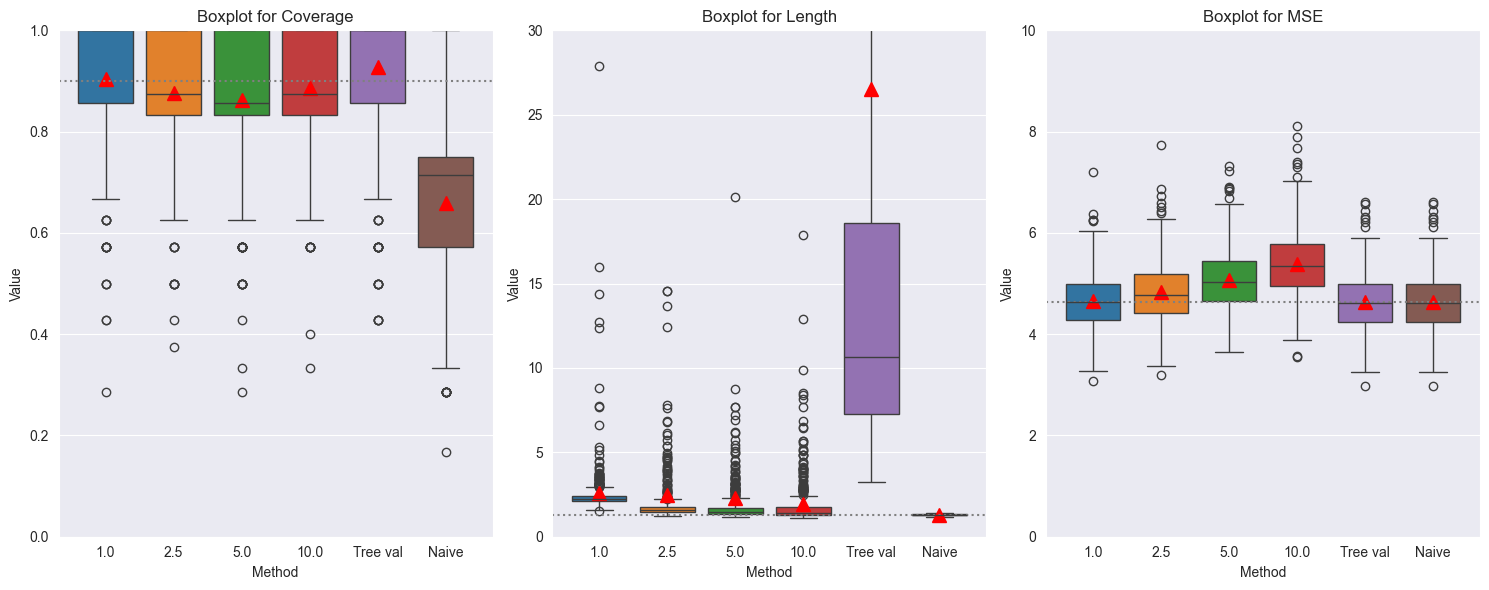

In [8]:
boxplots(dfs=[coverage_df, 
              length_df, 
              MSE_df], 
         len_lim=30,
         len_baseline_key="Naive",
         MSE_baseline_key="Naive",
         metrics=["Coverage", "Length", "MSE"])

In [ ]:
# TODO: Case 1 with 1, 5, 10